In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [3]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
# 实例化
# 训练集带入实例化的模型去进行训练，使用的接口是fit
# 使用其他接口将测试集导入我们训练好的模型，去获取我们希望过去的结果（score.Y_test）
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    wine.data, wine.target, test_size=0.3)

clf = DecisionTreeClassifier(random_state=0)
rlf = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain, Ytrain)
rlf = rlf.fit(Xtrain, Ytrain)
score_c = clf.score(Xtest, Ytest)
score_r = rlf.score(Xtest, Ytest)

print(f'Single Tree:{score_c}', f'Random Forest:{score_r}')

Single Tree:0.8703703703703703 Random Forest:0.9444444444444444


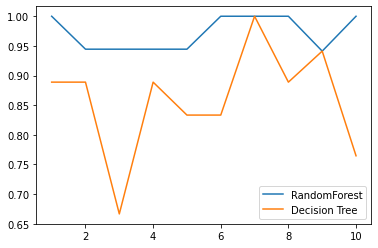

In [12]:
# 交叉验证：是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

plt.plot(range(1, 11), rfc_s, label='RandomForest')
plt.plot(range(1, 11), clf_s, label='Decision Tree')
plt.legend()
plt.show()

RandomForest:
0.9777777777777779
DecisionTree:
0.8705882352941178


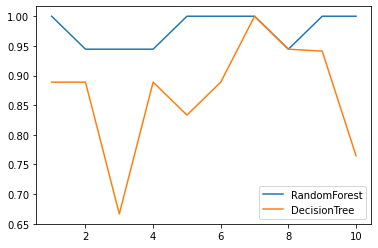

In [13]:
#====================一种更加有趣也更简单的写法===================#
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25), DecisionTreeClassifier()]:
    score = cross_val_score(model, wine.data, wine.target, cv=10)
    print("{}:".format(label)), print(score.mean())
    plt.plot(range(1, 11), score, label=label)
    plt.legend()
    label = "DecisionTree"

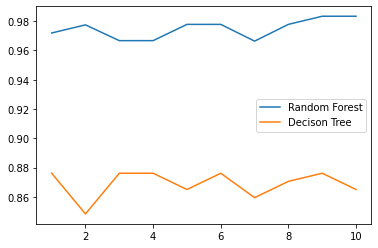

In [15]:
# 多组交叉训练对比
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10).mean()
    rfc_l.append(rfc_s)
    clf= DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv =10).mean()
    clf_l.append(clf_s)

plt.plot(range(1, 11), rfc_l, label = 'Random Forest')
plt.plot(range(1, 11), clf_l, label = 'Decison Tree')
plt.legend()
plt.show()

In [ ]:
%%time
#####【TIME WARNING: about 2mins 30 seconds】#####
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i + 1, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    superpa.append(rfc_s)

print(max(superpa), superpa.index(max(superpa)) + 1)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 201), superpa)
plt.show()